In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [18]:
iris = pd.read_csv("iris_flowers_data.csv", index_col = 0 )
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [21]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


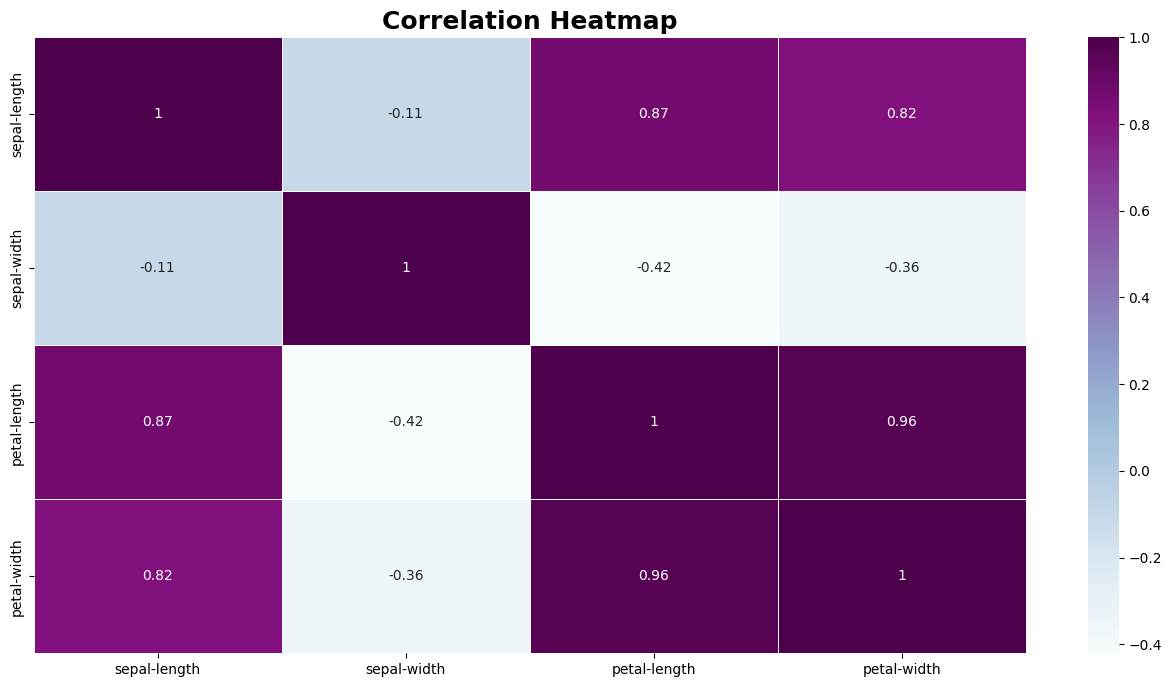

In [22]:
# Correlation heatmap


plt.figure(figsize= (16,8))
numeric_df = iris.select_dtypes(include=[float, int])

sns.heatmap(
    numeric_df.corr(),
    annot= True,
    cmap="BuPu",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
plt.show()

In [23]:
X = iris.drop(columns=['class'], axis='columns')
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y = iris['class']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)



In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [27]:
knn.score(X_test, y_test)

0.9736842105263158

## Decision Tree on Iris dataset

In [28]:
full_train_sample = pd.concat([X_train, y_train], axis=1)
full_test_sample = pd.concat([X_test, y_test], axis=1)

In [29]:
# function that computes the Gini Index for the root node (the parent node)
def gini_index_parent():
   full= full_train_sample["class"].count()
   found= full_train_sample['class'].value_counts()
   result=(found/full)
   return 1 - (result**2).sum()
# test the function
gini_index_parent()

0.6666135204081632

In [30]:
# function that computes the Gini Index for the first child node
def gini_index_node_1(feature, spliting_point):
   full= full_train_sample[full_train_sample[feature] <= spliting_point]['class'].count()
   found=full_train_sample[full_train_sample[feature] <= spliting_point]['class'].value_counts()
   result=(found/full)
   return 1 - (result**2).sum()
# test the function with the feature petal-length and the split point 2.45
gini_index_node_1("petal-length", 2.45)

0.0

In [32]:
# function that computes the Gini Index for the other child node
def gini_index_node_2(feature, spliting_point):
   full= full_train_sample[full_train_sample[feature] > spliting_point]['class'].count()
   found=full_train_sample[full_train_sample[feature] > spliting_point]['class'].value_counts()
   result=(found/full)
   return 1 - (result**2).sum()
#test the function
gini_index_node_2("petal-length", 2.45)

0.5

In [34]:
def information_gain (feature, spliting_point):
   full= len(full_train_sample)  #105
   w1=full_train_sample[full_train_sample[feature] <= spliting_point].index.size / full #35
   w2=full_train_sample[full_train_sample[feature] > spliting_point].index.size / full #70
   return gini_index_parent() - w1 * gini_index_node_1(feature,spliting_point) - w2 *gini_index_node_2(feature,spliting_point)
# test the function
information_gain("petal-length", 2.45)

0.3362563775510204

In [35]:
def information_gain (feature, spliting_point):
   full= len(full_train_sample)  #105
   w1=full_train_sample[full_train_sample[feature] <= spliting_point].index.size / full #35
   w2=full_train_sample[full_train_sample[feature] > spliting_point].index.size / full #70
   return gini_index_parent() - w1 * gini_index_node_1(feature,spliting_point) - w2 *gini_index_node_2(feature,spliting_point)
# test the function
information_gain("petal-length", 2.45)

0.3362563775510204

In [36]:
# Function that computes information gain for range of spliting points - feature
def find_optimal_spliting_point(feature, minv, maxv):
    for i in range(minv,maxv):
        print(feature, i/10, information_gain(feature,i/10))
# Test the function for petal-length
find_optimal_spliting_point("petal-length", 10, 69)

petal-length 1.0 0.0
petal-length 1.1 0.005899234693877431
petal-length 1.2 0.005899234693877431
petal-length 1.3 0.030598834159832
petal-length 1.4 0.10913584183673475
petal-length 1.5 0.21827168367346939
petal-length 1.6 0.29764320500927643
petal-length 1.7 0.3101755504833512
petal-length 1.8 0.3101755504833512
petal-length 1.9 0.3362563775510204
petal-length 2.0 0.3362563775510204
petal-length 2.1 0.3362563775510204
petal-length 2.2 0.3362563775510204
petal-length 2.3 0.3362563775510204
petal-length 2.4 0.3362563775510204
petal-length 2.5 0.3362563775510204
petal-length 2.6 0.3362563775510204
petal-length 2.7 0.3362563775510204
petal-length 2.8 0.3362563775510204
petal-length 2.9 0.3362563775510204
petal-length 3.0 0.3233825504648646
petal-length 3.1 0.3233825504648646
petal-length 3.2 0.3233825504648646
petal-length 3.3 0.3233825504648646
petal-length 3.4 0.3233825504648646
petal-length 3.5 0.30056356212186003
petal-length 3.6 0.29050807823129254
petal-length 3.7 0.2812916464614157

In [37]:
# Test the function for petal-width
find_optimal_spliting_point("petal-width", 1, 25)

petal-width 0.1 0.03706500288794756
petal-width 0.2 0.1881652445460943
petal-width 0.3 0.23956648208063713
petal-width 0.4 0.32304209183673477
petal-width 0.5 0.32304209183673477
petal-width 0.6 0.3362563775510204
petal-width 0.7 0.3362563775510204
petal-width 0.8 0.3362563775510204
petal-width 0.9 0.3362563775510204
petal-width 1.0 0.2812916464614157
petal-width 1.1 0.2652157473685992
petal-width 1.2 0.2373393268597761
petal-width 1.3 0.2272133372579801
petal-width 1.4 0.24946454619397168
petal-width 1.5 0.2814011651958081
petal-width 1.6 0.28052817717996287
petal-width 1.7 0.28052817717996287
petal-width 1.8 0.22422406462585032
petal-width 1.9 0.17383663437285035
petal-width 2.0 0.1288095690403821
petal-width 2.1 0.08072066326530603
petal-width 2.2 0.07326132804606977
petal-width 2.3 0.031433280087735826
petal-width 2.4 0.018513913592960063


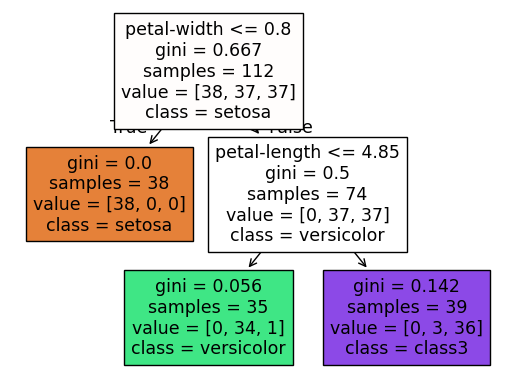

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# We want a tree with a depth of 1 for the moment
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)
# we show the decision tree information
tree.plot_tree(clf, feature_names=['sepal-length','sepal-width', 'petal-length', 'petal-width'],
               class_names=['setosa', 'versicolor', 'class3'], filled=True);

In [57]:
# Predict the species based on the decision tree with a depth of 2
clf.predict(X_test)
y_predict=clf.predict(X_test)
# The score method returns the accuracy score of the model
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_predict)
print(score)

0.9210526315789473
